In [ ]:
!pip install pyjanitor
import janitor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.9/207.9 kB 14.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = pd.read_csv('/content/data_ecommerce_customer_churn.csv')
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Tenure,194
WarehouseToHome,169
NumberOfDeviceRegistered,0
PreferedOrderCat,0
SatisfactionScore,0
MaritalStatus,0
NumberOfAddress,0
Complain,0
DaySinceLastOrder,213
CashbackAmount,0


# Imputación

In [ ]:
#Tenure WarehouseToHome DaySinceLastOrder
df['Tenure'].fillna(df['Tenure'].mean(), inplace=True)
# (para el futuro) df.fillna({'Tenure': df['DaySinceLastOrder'].mean()}, inplace=True)
df['WarehouseToHome'].fillna(df['WarehouseToHome'].mean(), inplace=True)
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].mean(), inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-6-d32aeb8cceeb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Tenure'].fillna(df['Tenure'].mean(), inplace=True)
<ipython-input-6-d32aeb8cceeb>:4: FutureWa

In [ ]:
df.isnull().sum().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0

# Codificación

In [ ]:
df_processed = df.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
categorical_columns = df_processed.select_dtypes(object).columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import sklearn.compose
import sklearn. preprocessing

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
categorical_transformer = sklearn.compose.make_column_transformer(
    (sklearn.preprocessing.OneHotEncoder(), categorical_columns),
    remainder="passthrough"
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_processed = (pd.DataFrame(
    categorical_transformer.fit_transform(df_processed),
    columns = categorical_transformer.get_feature_names_out(),
    index = df_processed.index
  )
  .rename_columns(
      function = lambda x: x.removeprefix("onehotencoder__")
  )
  .rename_columns(
      function = lambda x: x.removeprefix("remainder__")
  )
)
df_processed

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.rename` instead.
  return method(self._obj, *args, **kwargs)


,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,15.0,29.000000,4.0,3.0,2.0,0.0,7.000000,143.32,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,7.0,25.000000,4.0,1.0,2.0,0.0,7.000000,129.29,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,27.0,13.000000,3.0,1.0,5.0,0.0,7.000000,168.54,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20.0,25.000000,4.0,3.0,7.0,0.0,4.531652,230.27,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,30.0,15.000000,4.0,4.0,8.0,0.0,8.000000,322.17,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3936,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,9.000000,5.0,3.0,8.0,0.0,1.000000,231.86,0.0
3937,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,8.0,7.000000,2.0,2.0,4.0,0.0,4.000000,157.80,0.0
3938,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,30.0,6.000000,5.0,3.0,3.0,1.0,2.000000,156.60,0.0
3939,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,6.0,15.650583,4.0,3.0,10.0,1.0,0.000000,124.37,1.0


In [ ]:
df_processed

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,15.0,29.000000,4.0,3.0,2.0,0.0,7.000000,143.32,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,7.0,25.000000,4.0,1.0,2.0,0.0,7.000000,129.29,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,27.0,13.000000,3.0,1.0,5.0,0.0,7.000000,168.54,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20.0,25.000000,4.0,3.0,7.0,0.0,4.531652,230.27,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,30.0,15.000000,4.0,4.0,8.0,0.0,8.000000,322.17,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3936,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,9.000000,5.0,3.0,8.0,0.0,1.000000,231.86,0.0
3937,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,8.0,7.000000,2.0,2.0,4.0,0.0,4.000000,157.80,0.0
3938,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,30.0,6.000000,5.0,3.0,3.0,1.0,2.000000,156.60,0.0
3939,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,6.0,15.650583,4.0,3.0,10.0,1.0,0.000000,124.37,1.0


# Normalización

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_processed_norm = scaler.fit_transform(df_processed)
df_processed_norm = pd.DataFrame(df_processed_norm)
df_processed_norm.columns = df_processed.columns
df_processed_norm

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.245902,0.196721,0.6,0.50,0.047619,0.0,0.152174,0.440998,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.114754,0.163934,0.6,0.00,0.047619,0.0,0.152174,0.397828,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.442623,0.065574,0.4,0.00,0.190476,0.0,0.152174,0.518601,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.327869,0.163934,0.6,0.50,0.285714,0.0,0.098514,0.708545,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.491803,0.081967,0.6,0.75,0.333333,0.0,0.173913,0.991323,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3936,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.459016,0.032787,0.8,0.50,0.333333,0.0,0.021739,0.713437,0.0
3937,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.131148,0.016393,0.2,0.25,0.142857,0.0,0.086957,0.485553,0.0
3938,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.491803,0.008197,0.8,0.50,0.095238,1.0,0.043478,0.481861,0.0
3939,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.098361,0.087300,0.6,0.50,0.428571,1.0,0.000000,0.382689,1.0


# Implementación de una Red Nuronal para clasificación binaria

In [ ]:
df_processed_norm.Churn.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
Churn,
0.0,3267
1.0,674


In [ ]:
X = df_processed_norm.drop('Churn', axis=1)
y = df_processed_norm['Churn']
X

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.245902,0.196721,0.6,0.50,0.047619,0.0,0.152174,0.440998
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.114754,0.163934,0.6,0.00,0.047619,0.0,0.152174,0.397828
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.442623,0.065574,0.4,0.00,0.190476,0.0,0.152174,0.518601
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.327869,0.163934,0.6,0.50,0.285714,0.0,0.098514,0.708545
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.491803,0.081967,0.6,0.75,0.333333,0.0,0.173913,0.991323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3936,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.459016,0.032787,0.8,0.50,0.333333,0.0,0.021739,0.713437
3937,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.131148,0.016393,0.2,0.25,0.142857,0.0,0.086957,0.485553
3938,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.491803,0.008197,0.8,0.50,0.095238,1.0,0.043478,0.481861
3939,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.098361,0.087300,0.6,0.50,0.428571,1.0,0.000000,0.382689


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation
/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs)

In [ ]:
red = Sequential()

# Progresión de # de neuronas en redes tradicionales
#  1°     2°     3°    4°       Output
# 512 -> 256 -> 128 -> 64 ->  10 | 1 | ...

entrada = Dense(units=32, activation="relu", input_dim=X_train.shape[1])
oculta = Dense(units=16, activation="relu")
salida = Dense(units=1, activation="sigmoid")

red.add(entrada)
red.add(Dropout(0.3))
red.add(oculta)
red.add(Dropout(0.3))
red.add(salida)
red

In [ ]:
red.compile(
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01),
    loss = 'binary_crossentropy',
    metrics = ['accuracy'],
)

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

smote = SMOTE(random_state=42)
# smote = SMOTETomek(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
np.bincount(y_train)
np.bincount(y_train_over)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)
np.bincount(y_train)
np.bincount(y_train_under)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


array([476, 476])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

#model1 = red.fit(X_train, y_train, batch_size=16, epochs=50, validation_split=0.2,callbacks=[early_stopping])
#model1 = red.fit(X_train_over, y_train_over, batch_size=32, epochs=50, validation_split=0.2, callbacks=[early_stopping])
#model1 = red.fit(X_train_under, y_train_under, batch_size=32, epochs=50, validation_split=0.2, callbacks=[early_stopping])
#model1 = red.fit(X_train_over, y_train_over, batch_size=32, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping])
model1 = red.fit(X_train_under, y_train_under, batch_size=8, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8447 - loss: 0.3546 - val_accuracy: 0.8073 - val_loss: 0.3834
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8414 - loss: 0.3663 - val_accuracy: 0.8436 - val_loss: 0.3494
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8569 - loss: 0.3422 - val_accuracy: 0.8242 - val_loss: 0.3630
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8378 - loss: 0.3794 - val_accuracy: 0.8225 - val_loss: 0.3610
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8476 - loss: 0.3594 - val_accuracy: 0.8132 - val_loss: 0.4288
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8604 - loss: 0.3185 - val_accuracy: 0.7937 - val_loss: 0.3968
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8604 - loss: 0.3591 - val_accuracy: 0.8174 - val_loss: 0.3854
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8533 - loss: 0.3464 - val_accuracy: 0.8698 - val

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


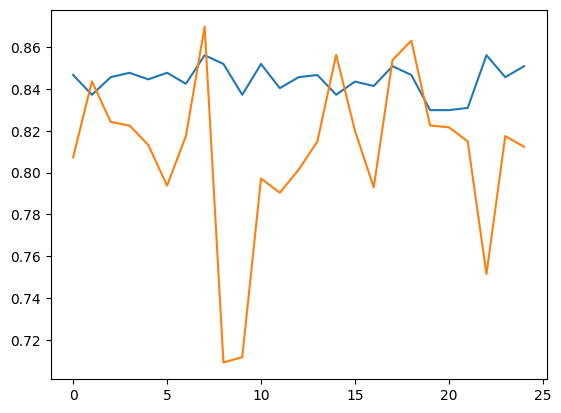

In [ ]:
plt.plot(model1.history["accuracy"])
plt.plot(model1.history["val_accuracy"])
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


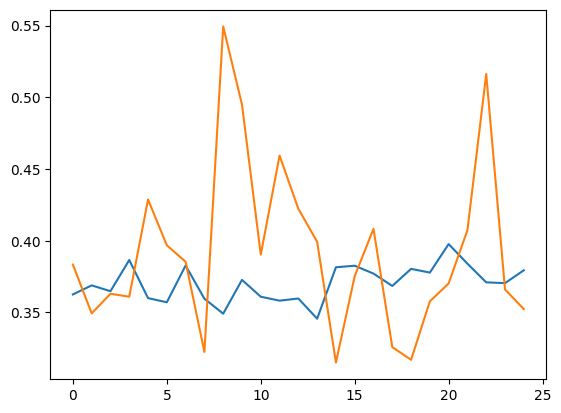

In [ ]:
plt.plot(model1.history["loss"])
plt.plot(model1.history["val_loss"])
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = red.predict(X_test)
y_pred = np.round(y_pred)
score = accuracy_score(y_test, y_pred)
print(score)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
0.8562975486052409


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


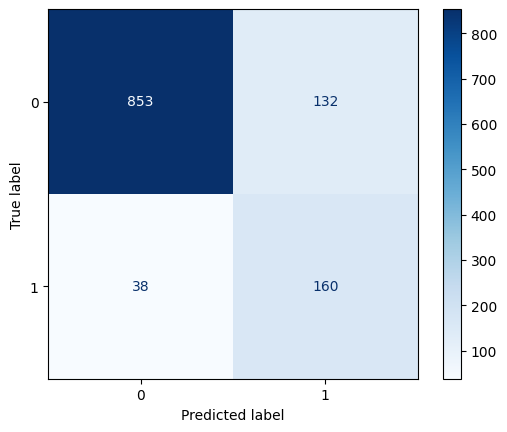

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot(cmap="Blues")
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
import numpy as np


class RedNeuronal(nn.Module):
    def __init__(self, input_dim):
        super(RedNeuronal, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(8, 1),
            nn.Sigmoid()
        )

        # Añadimos un diccionario para guardar el historial
        self.history = {
            'accuracy': [],
            'val_accuracy': [],
            'loss': [],
            'val_loss': []
        }

    def forward(self, x):
        return self.model(x)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def entrenar_red(X_train, X_test, y_train, y_test, batch_size=8, epochs=50):
    # Convertir DataFrames a numpy arrays y luego a tensores de PyTorch
    X_train_tensor = torch.FloatTensor(X_train.values if hasattr(X_train, 'values') else X_train)
    y_train_tensor = torch.FloatTensor(y_train.values if hasattr(y_train, 'values') else y_train)
    X_test_tensor = torch.FloatTensor(X_test.values if hasattr(X_test, 'values') else X_test)
    y_test_tensor = torch.FloatTensor(y_test.values if hasattr(y_test, 'values') else y_test)

    # Crear modelo
    input_dim = X_train.shape[1]
    model = RedNeuronal(input_dim)

    # Definir pérdida y optimizador
    criterion = nn.BCELoss()
    optimizer = optim.RMSprop(model.parameters(), lr=0.001, weight_decay=0.01)

    # Entrenamiento
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0

        # Entrenamiento por lotes
        for i in range(0, len(X_train_tensor), batch_size):
            X_batch = X_train_tensor[i:i+batch_size]
            y_batch = y_train_tensor[i:i+batch_size].unsqueeze(1)

            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            predicted = (outputs > 0.5).float()
            correct += (predicted == y_batch).sum().item()

        # Calcular métricas de entrenamiento
        train_loss = running_loss / (len(X_train_tensor) / batch_size)
        train_acc = correct / len(y_train_tensor)

        # Evaluación
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_test_tensor)
            val_loss = criterion(val_outputs, y_test_tensor.unsqueeze(1))
            val_predicted = (val_outputs > 0.5).float()
            val_acc = (val_predicted == y_test_tensor.unsqueeze(1)).sum().item() / len(y_test_tensor)

        # Guardar métricas en el historial
        model.history['accuracy'].append(train_acc)
        model.history['val_accuracy'].append(val_acc)
        model.history['loss'].append(train_loss)
        model.history['val_loss'].append(val_loss.item())

        print(f'Epoch [{epoch+1}/{epochs}]')
        print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc*100:.2f}%')
        print(f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc*100:.2f}%')
        print('-' * 50)

    return model

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def plotear_metricas(model):
    """Función para graficar las métricas del entrenamiento"""
    # Gráfica de accuracy
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(model.history['accuracy'], label='Training acc')
    plt.plot(model.history['val_accuracy'], label='Validation acc')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Gráfica de loss
    plt.subplot(1, 2, 2)
    plt.plot(model.history['loss'], label='Training loss')
    plt.plot(model.history['val_loss'], label='Validation loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

def evaluar_modelo(model, X_test, y_test):
    """Función para evaluar el modelo y mostrar métricas"""
    # Convertir datos a tensores
    X_test_tensor = torch.FloatTensor(X_test.values if hasattr(X_test, 'values') else X_test)
    y_test_tensor = torch.FloatTensor(y_test.values if hasattr(y_test, 'values') else y_test).unsqueeze(1)

    # Evaluar modelo
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        predicted_test = (test_outputs > 0.5).float()
        correct_test = (predicted_test.eq(y_test_tensor)).sum().item()
        accuracy_test = correct_test / len(y_test_tensor)

    print(f'El score de prueba es {accuracy_test * 100:.2f}%')

    # Crear y mostrar matriz de confusión
    y_test_np = y_test_tensor.numpy()
    predicted_np = predicted_test.numpy()

    cm = confusion_matrix(y_test_np, predicted_np)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    return accuracy_test, cm

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def aplicar_submuestreo(X_train, y_train):
    undersampler = RandomUnderSampler(random_state=42)
    X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)
    print("Distribución original:", np.bincount(y_train))
    print("Distribución después del submuestreo:", np.bincount(y_train_under))
    return X_train_under, y_train_under

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def aplicar_sobremuestreo(X_train, y_train):
    smote = SMOTE(random_state=42)
    X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
    print("Distribución original:", np.bincount(y_train))
    print("Distribución después del sobremuestreo:", np.bincount(y_train_over))
    return X_train_over, y_train_over

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
X_train_bal, y_train_bal = aplicar_submuestreo(X_train, y_train)
#X_train_bal, y_train_bal = aplicar_sobremuestreo(X_train, y_train)

Distribución original: [2282  476]
Distribución después del submuestreo: [476 476]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
modelo = entrenar_red(X_train_bal, X_test, y_train_bal, y_test,
                                        batch_size=8, epochs=20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch [1/20]
Train Loss: 0.7010, Train Accuracy: 55.99%
Val Loss: 0.7866, Val Accuracy: 16.74%
--------------------------------------------------
Epoch [2/20]
Train Loss: 0.6615, Train Accuracy: 59.45%
Val Loss: 0.8161, Val Accuracy: 16.74%
--------------------------------------------------
Epoch [3/20]
Train Loss: 0.6678, Train Accuracy: 58.61%
Val Loss: 0.8032, Val Accuracy: 17.92%
--------------------------------------------------
Epoch [4/20]
Train Loss: 0.6521, Train Accuracy: 60.71%
Val Loss: 0.7981, Val Accuracy: 23.58%
--------------------------------------------------
Epoch [5/20]
Train Loss: 0.6309, Train Accuracy: 65.44%
Val Loss: 0.8117, Val Accuracy: 28.83%
--------------------------------------------------
Epoch [6/20]
Train Loss: 0.6007, Train Accuracy: 67.44%
Val Loss: 0.8549, Val Accuracy: 28.91%
--------------------------------------------------
Epoch [7/20]
Train Loss: 0.6042, Train Accuracy: 68.91%
Val Loss: 0.8406, Val Accuracy: 35.50%
-----------------------------

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


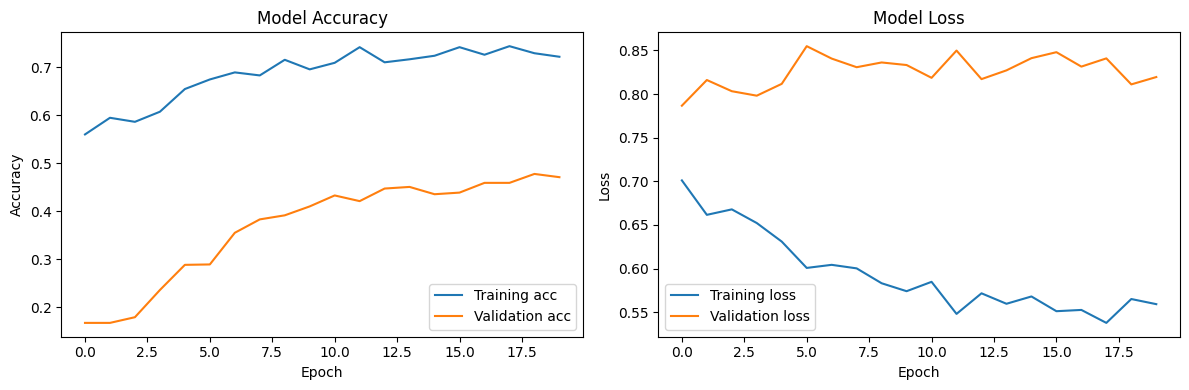

In [ ]:
plotear_metricas(modelo)


El score de prueba es 47.08%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


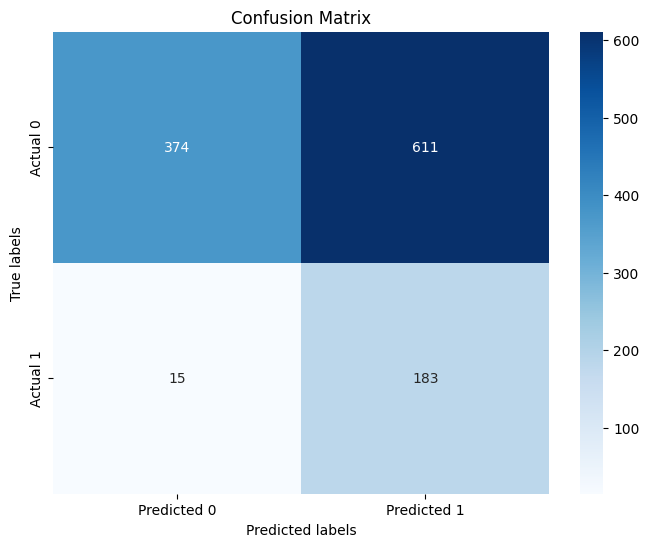

In [ ]:
accuracy_test, cm = evaluar_modelo(modelo, X_test, y_test)